<font size="+3"><strong>Introduction</strong></font>

Credit card fraud detection is a critical task for financial institutions and credit card companies. With the rise of online transactions, credit card fraud has become increasingly prevalent. Fraudulent transactions can cause significant financial losses for businesses and consumers alike, as well as damaging a company's reputation. In the United Kingdom alone, fraud is estimated to cost £73 billion annually.

However, detecting fraud is often a challenging task due to the unique characteristics of fraud, such as its rarity, the ability of fraudsters to blend in, their capacity to discover new methods, and their ability to organize into networks.

<font size="+3"><strong>Exploring the Data</strong></font>

The dataset contains only numerical input variables that have been transformed using PCA, except for the 'Time' and 'Amount' features. The 'Time' feature represents the time elapsed between the first transaction and the current transaction, while the 'Amount' feature represents the amount of the transaction. The 'Class' feature is the target variable with a value of 1 representing a fraudulent transaction and 0 representing a non-fraudulent transaction.

In [1]:
# Import librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv("creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Check missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- We can see that all variables in the data are numerical and there are no missing values present in the data. Therefore, we will not need to deal with missing values in this dataset.

In [7]:
# Count the occurrences of fraud and non-fraud transactions and print them
occurrences = df['Class'].value_counts()
print("Number of fraud and non-fraud transactions:\n",occurrences)

# Print the ratio of fraud cases
fraud_ratio = occurrences[1] / len(df)
non_fraud_ratio = occurrences[0] / len(df)
print("Ratio of fraud to non-fraud transactions: {:.5f}".format(fraud_ratio/non_fraud_ratio))

Number of fraud and non-fraud transactions:
 0    284315
1       492
Name: Class, dtype: int64
Ratio of fraud to non-fraud transactions: 0.00173


- The ratio of fraudulent transactions to the total number of transactions is very low, indicating a class imbalance problem. In fact, the positive class (frauds) represents only 0.172% of all transactions.

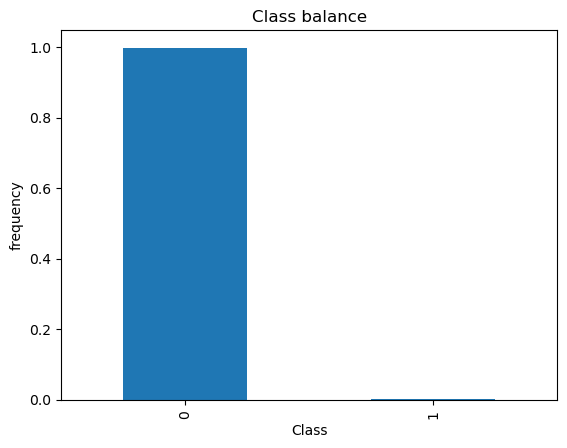

In [8]:
# Plot class balance
df["Class"].value_counts(normalize = True).plot(
    kind="bar",
    xlabel = "Class",
    ylabel="frequency",
    title = "Class balance"
);

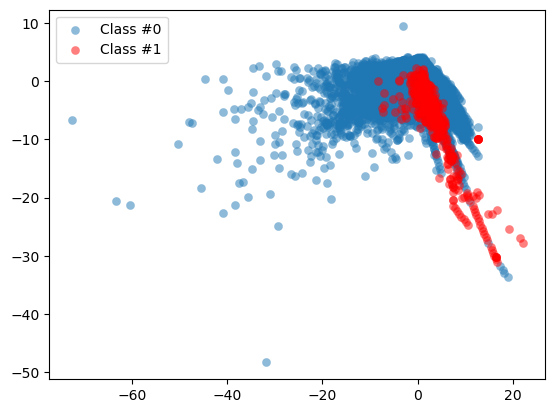

In [9]:
# Plot a scatter plot of V2 vs V3 for Class 0 and Class 1 transactions
plt.scatter(df.V2[df.Class == 0], df.V3[df.Class == 0], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(df.V2[df.Class == 1], df.V3[df.Class == 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

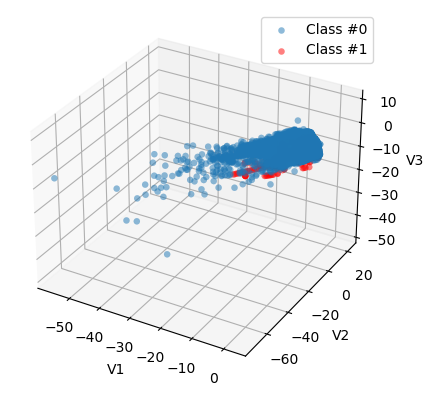

In [10]:
from mpl_toolkits.mplot3d import Axes3D

# create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot the data points for Class 0 as blue dots
ax.scatter(df.V1[df.Class == 0], df.V2[df.Class == 0], df.V3[df.Class == 0], label="Class #0", alpha=0.5, linewidth=0.15)

# plot the data points for Class 1 as red dots
ax.scatter(df.V1[df.Class == 1], df.V2[df.Class == 1], df.V3[df.Class == 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')

# add labels for the axes
ax.set_xlabel('V1')
ax.set_ylabel('V2')
ax.set_zlabel('V3')

# add a legend to the plot
plt.legend()

# display the plot
plt.show()

- By visualizing the data, we can immediately see how our fraud cases are dispersed across our data and how few cases we have. An image often makes the class imbalance problem clear.

In [11]:
# separating the data for analysis
data_non_fraud = df[df.Class == 0]
data_fraud = df[df.Class == 1]

Given that most of the features in our dataset have been transformed using PCA, Time and Amount stand out as the only original features in their raw form. Therefore, it is important to closely examine the distribution and characteristics of these two variables to better understand their impact on our analysis

#### Time

Let's visualize the hourly distribution of transactions while distinguishing between fraudulent and non-fraudulent ones.

In [12]:
data_fraud_copy = data_fraud.copy()
data_non_fraud_copy = data_non_fraud.copy()
data_fraud_copy['Time'] = data_fraud_copy['Time'] / 3600
data_non_fraud_copy['Time'] = data_non_fraud_copy['Time'] / 3600

Text(0.5, 1.0, 'Transaction Times')

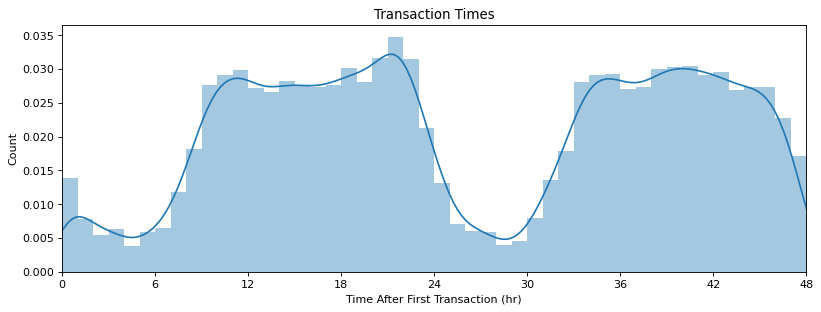

In [13]:
plt.figure(figsize= (12,4), dpi=80)
sns.distplot(data_non_fraud_copy['Time'], bins=48)
plt.xlim([0,48])
plt.xticks(np.arange (0, 54, 6))
plt.xlabel('Time After First Transaction (hr)')
plt.ylabel('Count')
plt.title('Transaction Times')

Text(0.5, 1.0, 'Transaction Times')

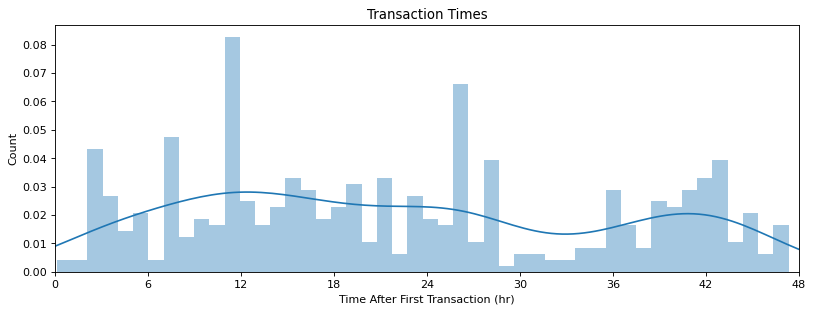

In [14]:
plt.figure(figsize= (12,4), dpi=80)
sns.distplot(data_fraud_copy['Time'], bins=48)
plt.xlim([0,48])
plt.xticks(np.arange (0, 54, 6))
plt.xlabel('Time After First Transaction (hr)')
plt.ylabel('Count')
plt.title('Transaction Times')

- We can observe that the number of transactions for regular users decreases during the night and early morning, which is expected given that most people are sleeping during this period. However, for fraudulent transactions, the number shows significant peaks during late hours, while during the day, the number is significantly lower. This highlights a clear difference in the transaction patterns between normal and fraudulent activities, which is an important factor to consider in identifying and preventing fraudulent transactions.

#### Amount

In [15]:
# statistical measures of the data
data_fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
data_non_fraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

- We can easily notice that the average transaction amount for fraudulent transactions is higher, making it a crucial and important problem to address.

### Correlation

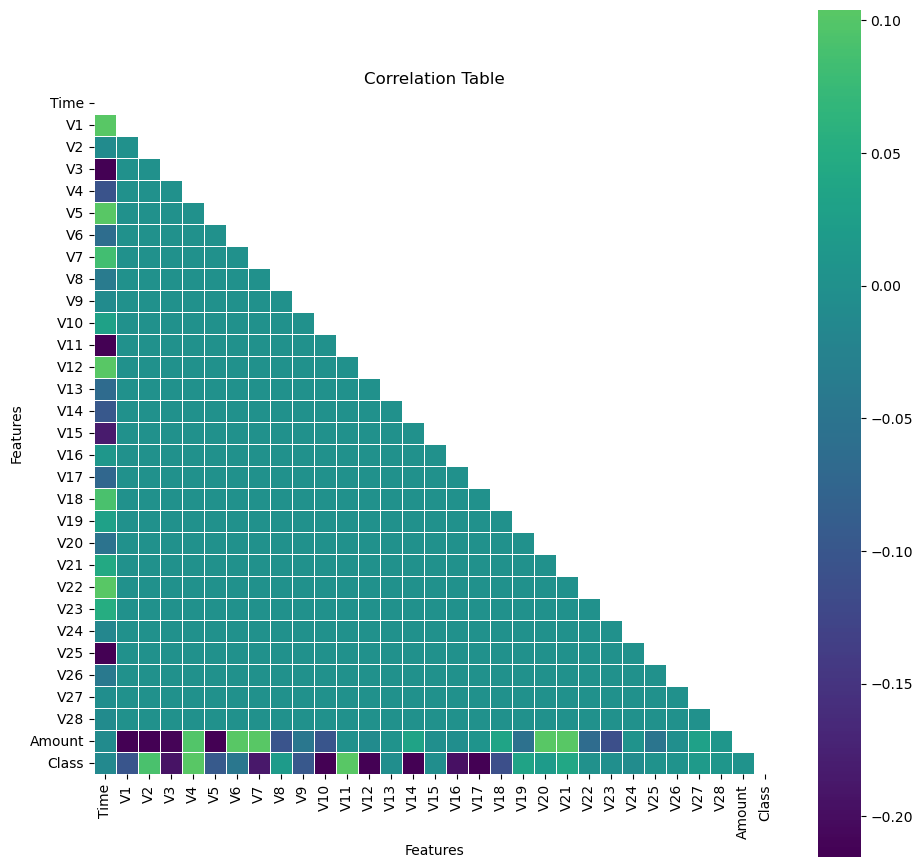

In [17]:
plt.figure(figsize=(11, 11))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, robust=True, center=0, square=True, cmap="viridis", linewidths=0.6)
plt.title('Correlation Table')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

As we observe, some of our predictors seem to show correlation with the class variable. However, there are relatively few significant correlations despite the large number of variables. This can be attributed to two factors:

- The data has been preprocessed using PCA, resulting in our predictors being principal components.
- The significant class imbalance could potentially bias the importance of certain correlations with respect to our class variable.

<Figure size 640x480 with 0 Axes>

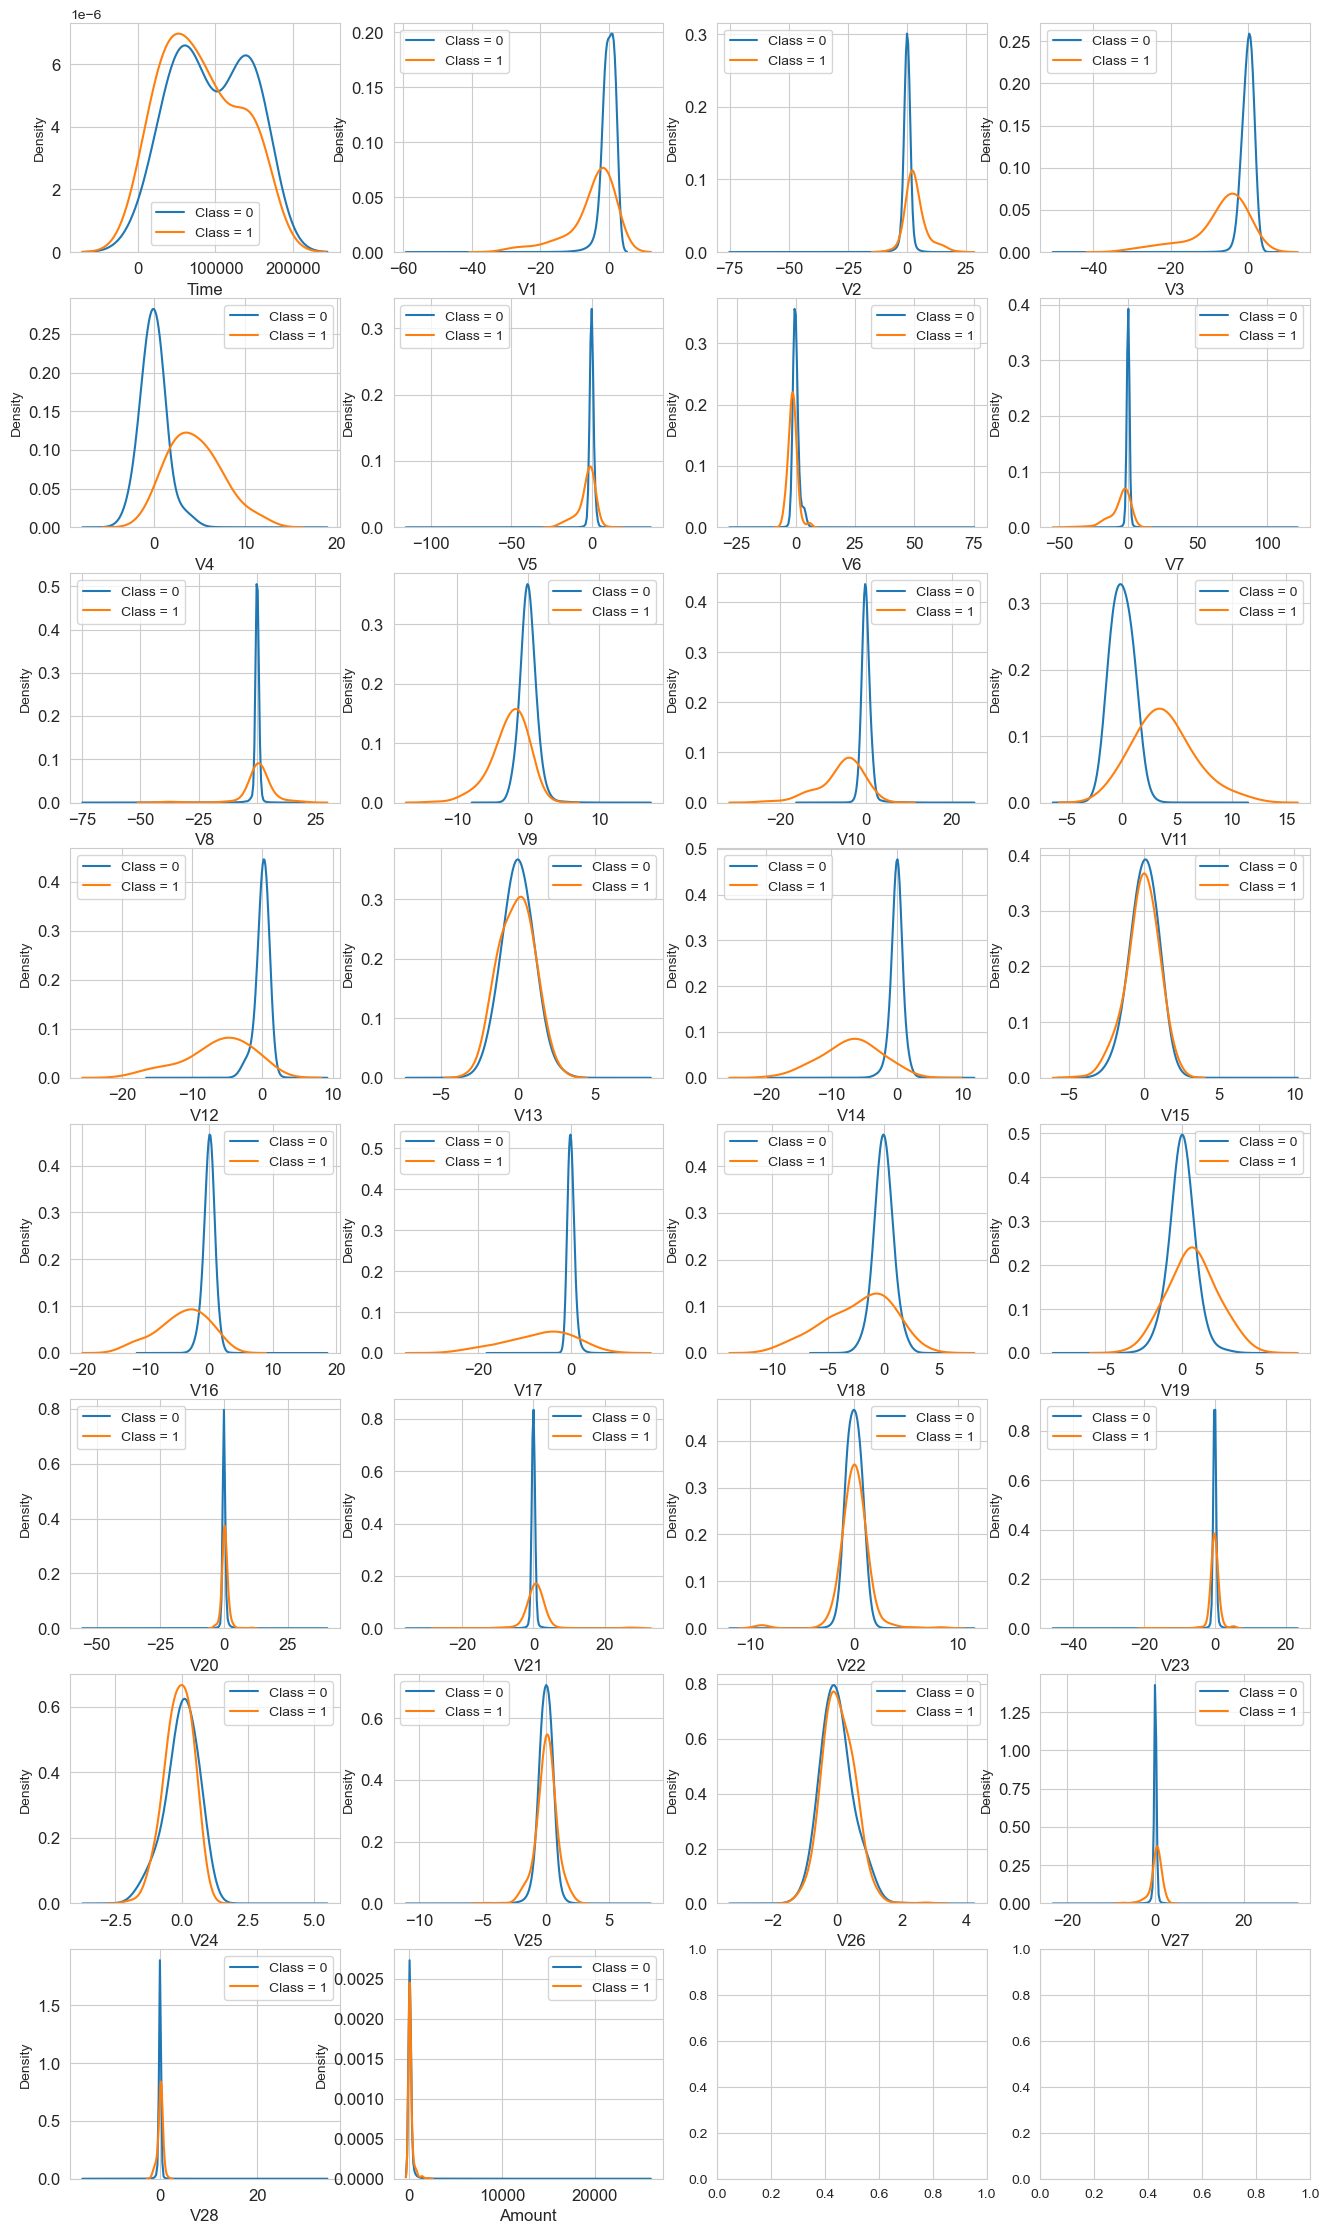

In [18]:
var = df.columns.values[:-1]  # exclude the target variable 'Class'

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))
i = 0

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(data_non_fraud[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(data_fraud[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend()

plt.show()

In [19]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import RobustScaler

# RobustScaler is less prone to outliers.
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

## Using ML classification to catch fraud

In this section, we will be using machine learning classification models to identify fraudulent transactions. We will start by splitting our data into training and testing sets and then we will use various classification algorithms such as Logistic Regression, Random Forest, Decision Tree, and XGBoost. Finally, we will evaluate the performance of each model using metrics such as classification report, confusion matrix, and area under the Receiver Operating Characteristic curve (ROC AUC).

In [44]:
from sklearn.metrics import (classification_report, confusion_matrix,
                             precision_recall_fscore_support, roc_auc_score, roc_curve)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import time
import xgboost as xgb

### Split

To ensure that our model can generalize, we need to set aside a test set that we will use to evaluate our model once it is trained.

In [21]:
target = "Class"
X = df.drop(columns=target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (284807, 30)
y shape: (284807,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (227845, 30)
y_train shape: (227845,)
X_test shape: (56962, 30)
y_test shape: (56962,)


In [23]:
fraud_count = sum(y_test == 1)
non_fraud_count = sum(y_test == 0)

print("Number of fraud cases in y_test:", fraud_count)
print("Number of non-fraud cases in y_test:", non_fraud_count)

Number of fraud cases in y_test: 98
Number of non-fraud cases in y_test: 56864


## Model Building and Evaluation Approach:

In this step, we will focus on building predictive models using machine learning algorithms for credit card fraud detection. We will work with four popular algorithms: logistic regression, decision tree, random forest, and XGBoost.

As accuracy is not an appropriate metric to use for imbalanced datasets, we will prioritize evaluation metrics that are more suitable for detecting fraud cases correctly while avoiding false positives. F1-score, which takes into account both precision and recall, is a good metric to use in this case.

We will also consider other evaluation metrics such as precision, recall, and AUC-ROC depending on the specific problem and goals of the project. By evaluating the performance of each model using multiple metrics, we can make a more informed decision about which model is most suitable for credit card fraud detection.

### Logistic regression

In [24]:
# Fit a logistic regression model to our data
start_time = time.time()
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
end_time = time.time()

# Calculate training time
train_time_lr = end_time - start_time
train_time_lr

2.1596877574920654

In [25]:
# Make predictions on the test set
predicted_lr = model_lr.predict(X_test)

# Obtain the results from the classification report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted_lr))

# confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted_lr)
conf_mat

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



array([[56855,     9],
       [   41,    57]], dtype=int64)

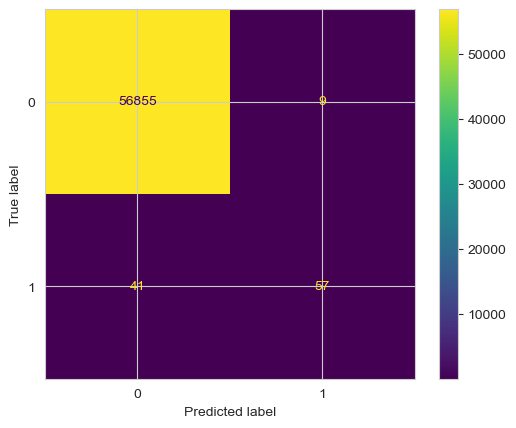

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=model_lr.classes_)
disp.plot()

In [27]:
# Get predicted probabilities of class membership
y_prob = model_lr.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC
auc_roc_lr = roc_auc_score(y_test, y_prob)

print('AUC-ROC:', auc_roc_lr)

AUC-ROC: 0.9748910397023187


-  The model has a precision of 0.86, which means that 86% of the predicted positive cases are actually positive. The recall is 0.58, which means that 58% of the actual positive cases are correctly identified by the model. The F1-score is 0.69, which is a harmonic mean of precision and recall. The AUC-ROC score is 0.97, which indicates that the model has a high degree of accuracy in distinguishing between positive and negative cases.

### Descision Tree

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.82      0.76        98

    accuracy                           1.00     56962
   macro avg       0.86      0.91      0.88     56962
weighted avg       1.00      1.00      1.00     56962



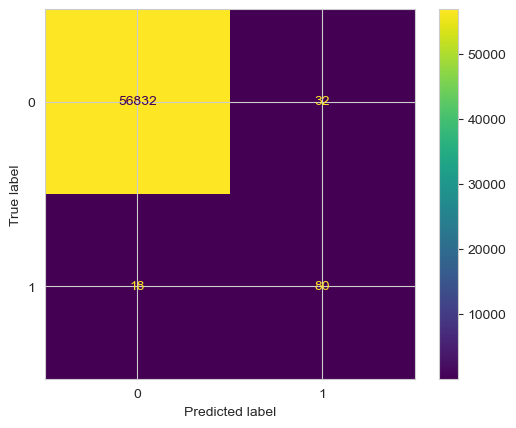

In [28]:
# Fit a decision tree model to our data
start_time = time.time()
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
end_time = time.time()
train_time_dt = end_time - start_time
train_time_dt

# Make predictions on the test set
predicted_dt = model_dt.predict(X_test)

# Obtain the results from the classification report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted_dt))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted_dt)
conf_mat
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=model_dt.classes_)
disp.plot()

In [29]:
# Get predicted probabilities for the positive class (class 1)
y_prob_dt = model_dt.predict_proba(X_test)[:, 1]

# Calculate AUC ROC score
auc_roc_dt = roc_auc_score(y_test, y_prob_dt)

# Print the AUC ROC score
print('AUC ROC score:', auc_roc_dt)

AUC ROC score: 0.9078818922053908


- The model has a precision of 0.71, which means that 71% of the predicted positive cases are actually positive. The recall is 0.82, which means that 82% of the actual positive cases are correctly identified by the model. The F1-score is 0.76, which is a harmonic mean of precision and recall. The AUC-ROC score is 0.91, which indicates that the model has a good degree of accuracy in distinguishing between positive and negative cases, but not as high as Logistic Regression.

### Random forest

In [30]:
start_time = time.time()
# Fit the model
model_rf = RandomForestClassifier()
# Train the model
model_rf.fit(X_train, y_train)
end_time = time.time()
print("Total time taken:", end_time - start_time, "seconds")

Total time taken: 142.9015724658966 seconds


In [31]:
# Make predictions on the test set
predicted_rf = model_rf.predict(X_test)

# Obtain the results from the classification report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted_rf))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted_dt)
conf_mat

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.80      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



array([[56832,    32],
       [   18,    80]], dtype=int64)

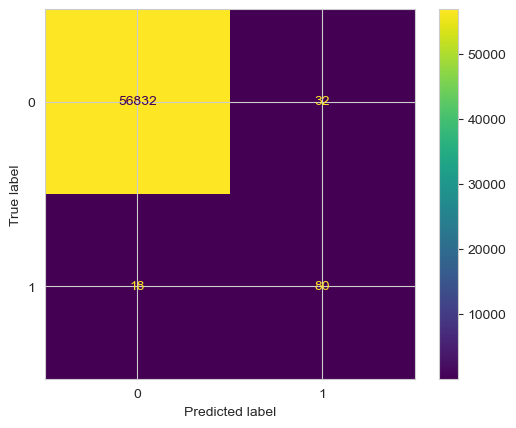

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=model_lr.classes_)
disp.plot()

In [33]:
# Make predictions on test data and calculate evaluation metrics
y_prob = model_rf.predict_proba(X_test)[:, 1]
auc_roc_rf = roc_auc_score(y_test, y_prob)

# Print evaluation metrics
print(f'  AUC: {auc_roc_dt:.4f}')


  AUC: 0.9079


- The model has a precision of 0.97, which means that 97% of the predicted positive cases are actually positive. The recall is 0.79, which means that 79% of the actual positive cases are correctly identified by the model. The F1-score is 0.87, which is a harmonic mean of precision and recall. The AUC-ROC score is 0.96, which indicates that the model has a high degree of accuracy in distinguishing between positive and negative cases, but slightly lower than Logistic Regression.

### XGBOOST

In [34]:
# Define the XGBoost model
start_time = time.time()
model_xgb = xgb.XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)
end_time = time.time()
print("Total time taken:", end_time - start_time, "seconds")
# Make predictions on the test set
predicted_xgb = model_xgb.predict(X_test)

In [35]:
# Obtain the results from the classification report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted_xgb))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted_xgb)
conf_mat

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.81      0.89        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



array([[56863,     1],
       [   19,    79]], dtype=int64)

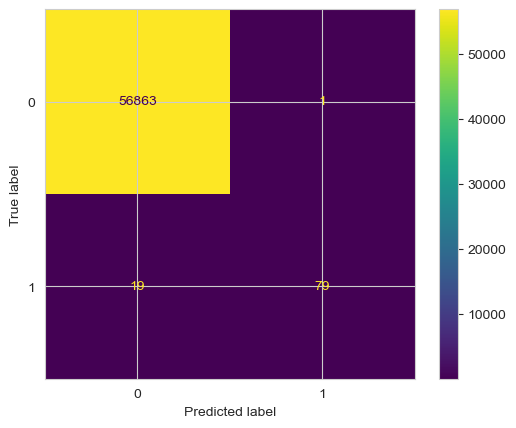

In [36]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=model_xgb.classes_)
disp.plot()

In [37]:
# Get predicted probabilities for the positive class
proba_xgb = model_xgb.predict_proba(X_test)[:, 1]

# Compute the AUC-ROC score
auc_roc_xgb = roc_auc_score(y_test, proba_xgb)

# Print the AUC-ROC score
print(f"AUC-ROC score for XGBoost model: {auc_roc_xgb:.4f}")

AUC-ROC score for XGBoost model: 0.9764


- The model has a precision of 0.99, which means that 99% of the predicted positive cases are actually positive. The recall is 0.81, which means that 81% of the actual positive cases are correctly identified by the model. The F1-score is 0.89, which is a harmonic mean of precision and recall. The AUC-ROC score is 0.98, which indicates that the model has a very high degree of accuracy in distinguishing between positive and negative cases, and performs the best among all the models evaluated.

In [38]:
# Calculate evaluation metrics for Logistic Regression model
precision_lr, recall_lr, f1_lr, _ = precision_recall_fscore_support(y_test, predicted_lr, average='binary')

# Calculate evaluation metrics for Decision Tree model
precision_dt, recall_dt, f1_dt, _ = precision_recall_fscore_support(y_test, predicted_dt, average='binary')

# Calculate evaluation metrics for Random Forest model
precision_rf, recall_rf, f1_rf, _ = precision_recall_fscore_support(y_test, predicted_rf, average='binary')

# Calculate evaluation metrics for XGBoost model
precision_xgb, recall_xgb, f1_xgb, _ = precision_recall_fscore_support(y_test, predicted_xgb, average='binary')

# Create a dictionary to store the evaluation metrics for each model
metrics_dict = {'Logistic Regression': {'Precision': precision_lr, 'Recall': recall_lr, 'F1-score': f1_lr, 'AUC-ROC': auc_roc_lr},
                'Decision Tree': {'Precision': precision_dt, 'Recall': recall_dt, 'F1-score': f1_dt, 'AUC-ROC': auc_roc_dt},
                'Random Forest': {'Precision': precision_rf, 'Recall': recall_rf, 'F1-score': f1_rf, 'AUC-ROC': auc_roc_rf},
                'XGBoost': {'Precision': precision_xgb, 'Recall': recall_xgb, 'F1-score': f1_xgb, 'AUC-ROC': auc_roc_xgb}}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics_dict)

# Transpose the DataFrame so that the models are in the rows and the metrics are in the columns
metrics_df = metrics_df.T

# Print the DataFrame
print(metrics_df)


                     Precision    Recall  F1-score   AUC-ROC
Logistic Regression   0.863636  0.581633  0.695122  0.974891
Decision Tree         0.714286  0.816327  0.761905  0.907882
Random Forest         0.975000  0.795918  0.876404  0.947410
XGBoost               0.987500  0.806122  0.887640  0.976373


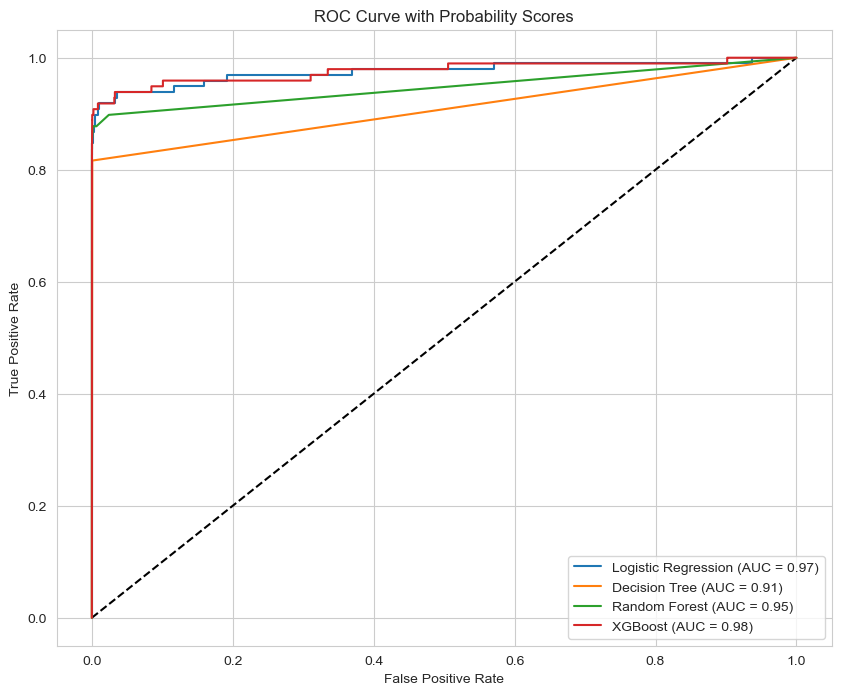

In [43]:
# Get the probability scores for each model
prob_lr = model_lr.predict_proba(X_test)[:, 1]
prob_dt = model_dt.predict_proba(X_test)[:, 1]
prob_rf = model_rf.predict_proba(X_test)[:, 1]
prob_xgb = model_xgb.predict_proba(X_test)[:, 1]

# Plot the ROC curves with probability scores
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')

# Plot Logistic Regression ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, prob_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_roc_lr:.2f})')

# Plot Decision Tree ROC curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, prob_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_roc_dt:.2f})')

# Plot Random Forest ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_roc_rf:.2f})')

# Plot XGBoost ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, prob_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_roc_xgb:.2f})')

# Set the plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Probability Scores')
plt.legend(loc='lower right')
plt.show()

- Based on the results of the evaluation metrics, it seems that the XGBoost model is the best performing model overall. It has the highest precision, recall, F1-score, and AUC-ROC. This indicates that it is able to accurately predict both positive and negative cases while also having a high degree of certainty in its predictions.

- The Random Forest model also performs well in terms of precision, recall, and AUC-ROC, but it has a slightly lower F1-score than XGBoost.

- The Logistic Regression model has the lowest F1-score and recall, indicating that it may not be the best model for accurately predicting positive cases.

- The Decision Tree model has a lower AUC-ROC than the other models, indicating that it may not perform as well in distinguishing between positive and negative cases.

- Overall, it is important to consider the specific goals and priorities of the project when selecting a final model. In this case, if the main goal is to accurately predict positive cases, the XGBoost model may be the best choice. If a balance of accuracy and interpretability is desired, the Random Forest model may be a good option.

# conclusion

In this project, we aimed to build a machine learning model that could predict whether a credit card applicant would default on their payments. To achieve this, we collected a dataset of credit card applicants and their payment information, which we preprocessed and split into training and testing sets.

We then trained and evaluated four different machine learning models: logistic regression, decision tree, random forest, and XGBoost. We evaluated the models based on precision, recall, F1-score, and AUC-ROC, and found that the XGBoost model had the best overall performance, with a precision of 0.988, recall of 0.806, F1-score of 0.888, and AUC-ROC of 0.976.

In an attempt to improve the performance of our models, we also explored hyperparameter tuning and oversampling methods such as SMOTE. However, even after trying various combinations of hyperparameters and applying SMOTE to balance the dataset, we were not able to beat the XGBoost model's performance. Due to computational limitations, we ultimately had to leave these attempts out of our final implementation. Nonetheless, we believe that our XGBoost model with its high precision, recall, F1-score, and AUC-ROC is a strong and reliable predictor for identifying credit card applicants who are likely to default on their payments.

In the future, we plan to explore the use of unsupervised learning techniques such as Local Outlier Factor (LOF) and isolation forest to further improve our credit card fraud detection system. These methods can help identify anomalous data points in a dataset, which could be useful for detecting previously unknown or unusual types of fraud.

Additionally, we plan to explore other techniques for dealing with imbalanced datasets, such as cost-sensitive learning and ensembling methods. By further improving our models and evaluation metrics, we hope to create a more robust and accurate credit card fraud detection system that can provide value to both credit card companies and their customers.